# Running Neural GAM - Linear regression

1. Install requirements
2. Load data
3. Train NeuralGAM
4. Visualize partial dependence plots

In [9]:
import sys
!{sys.executable} -m pip install -q -r ../requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '../requirements.txt'
You should consider upgrading via the 'c:\Users\iortega\repo\Neural_GAM\win-env\Scripts\python.exe -m pip install --upgrade pip' command.


In [10]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from src.NeuralGAM.ngam import NeuralGAM, plot_partial_dependencies
import pandas as pd

Define the number of units of the Neural Network. For this example, we will use a *shallow* neural network with a single hidden layer with 1024 units. We can also define the learning rate for the Neural Network training. 

In [11]:
units = 1024
learning_rate = 0.0053

output_path = "./results"
input_path = "./dataset/Scenario_I/homoscedastic_uniform_gaussian/"
# Create results directory
if not os.path.exists(output_path):
    os.makedirs(output_path)


input_path = os.path.normpath(os.path.abspath(os.path.join("./", input_path)))


Load dataset into Pandas Dataframes. If you want to preprocess or select some features, do it here. Our synthetic dataset is composed of train and test files, which we load separately.

In [17]:
X_train = pd.read_csv(os.path.join(input_path, "X_train.csv"), index_col=0).reset_index(drop=True)
y_train = pd.read_csv(os.path.join(input_path, "y_train.csv"), index_col=0).reset_index(drop=True).squeeze()
fs_train = pd.read_csv(os.path.join(input_path, "fs_train.csv"), index_col=0).reset_index(drop=True)
# center theoretical fs for plotting
fs_train = fs_train - fs_train.mean()

X_test = pd.read_csv(os.path.join(input_path, "X_test.csv"), index_col=0).reset_index(drop=True)
y_test = pd.read_csv(os.path.join(input_path, "y_test.csv"), index_col=0).reset_index(drop=True).squeeze()
fs_test = pd.read_csv(os.path.join(input_path, "fs_test.csv"), index_col=0).reset_index(drop=True)
# center theoretical fs for plotting
fs_test = fs_test - fs_test.mean()


Create and Train NeuralGAM instance of Gaussian Family. 

In [18]:
ngam = NeuralGAM(num_inputs = len(X_train.columns), family="gaussian", num_units=units, learning_rate=learning_rate)

muhat, fs_train_estimated, eta = ngam.fit(X_train = X_train, 
                                y_train = y_train, 
                                max_iter_ls = 10, 
                                bf_threshold=10e-5,
                                ls_threshold=0.1,
                                max_iter_backfitting=10)




Fitting GAM 
 -- max_it = 10
 -- max_iter_backfitting = 10
 -- ls_threshold = 0.1
 -- bf_threshold=0.0001
 -- learning_rate=0.0053


Iter Local Scoring 1
766/766 [==============================] - 3s 3ms/step
BACKFITTING ITERATION #1: Current err = 0.006625201989494964
766/766 [==============================] - 6s 8ms/step
BACKFITTING ITERATION #2: Current err = 8.524417479660516e-13
Dev delta = 0.9784692616064707
END Local Scoring Algorithm at iteration 2, dev_delta = 0.9784692616064707, eta0 = 0.01902771114253806


Once we trained the model, we can visualize the learnt partial effects from the training set. In this case, we will use an auxiliary function that allows us to plot both the original (theretical) functions and the learnt partial effect from the training set

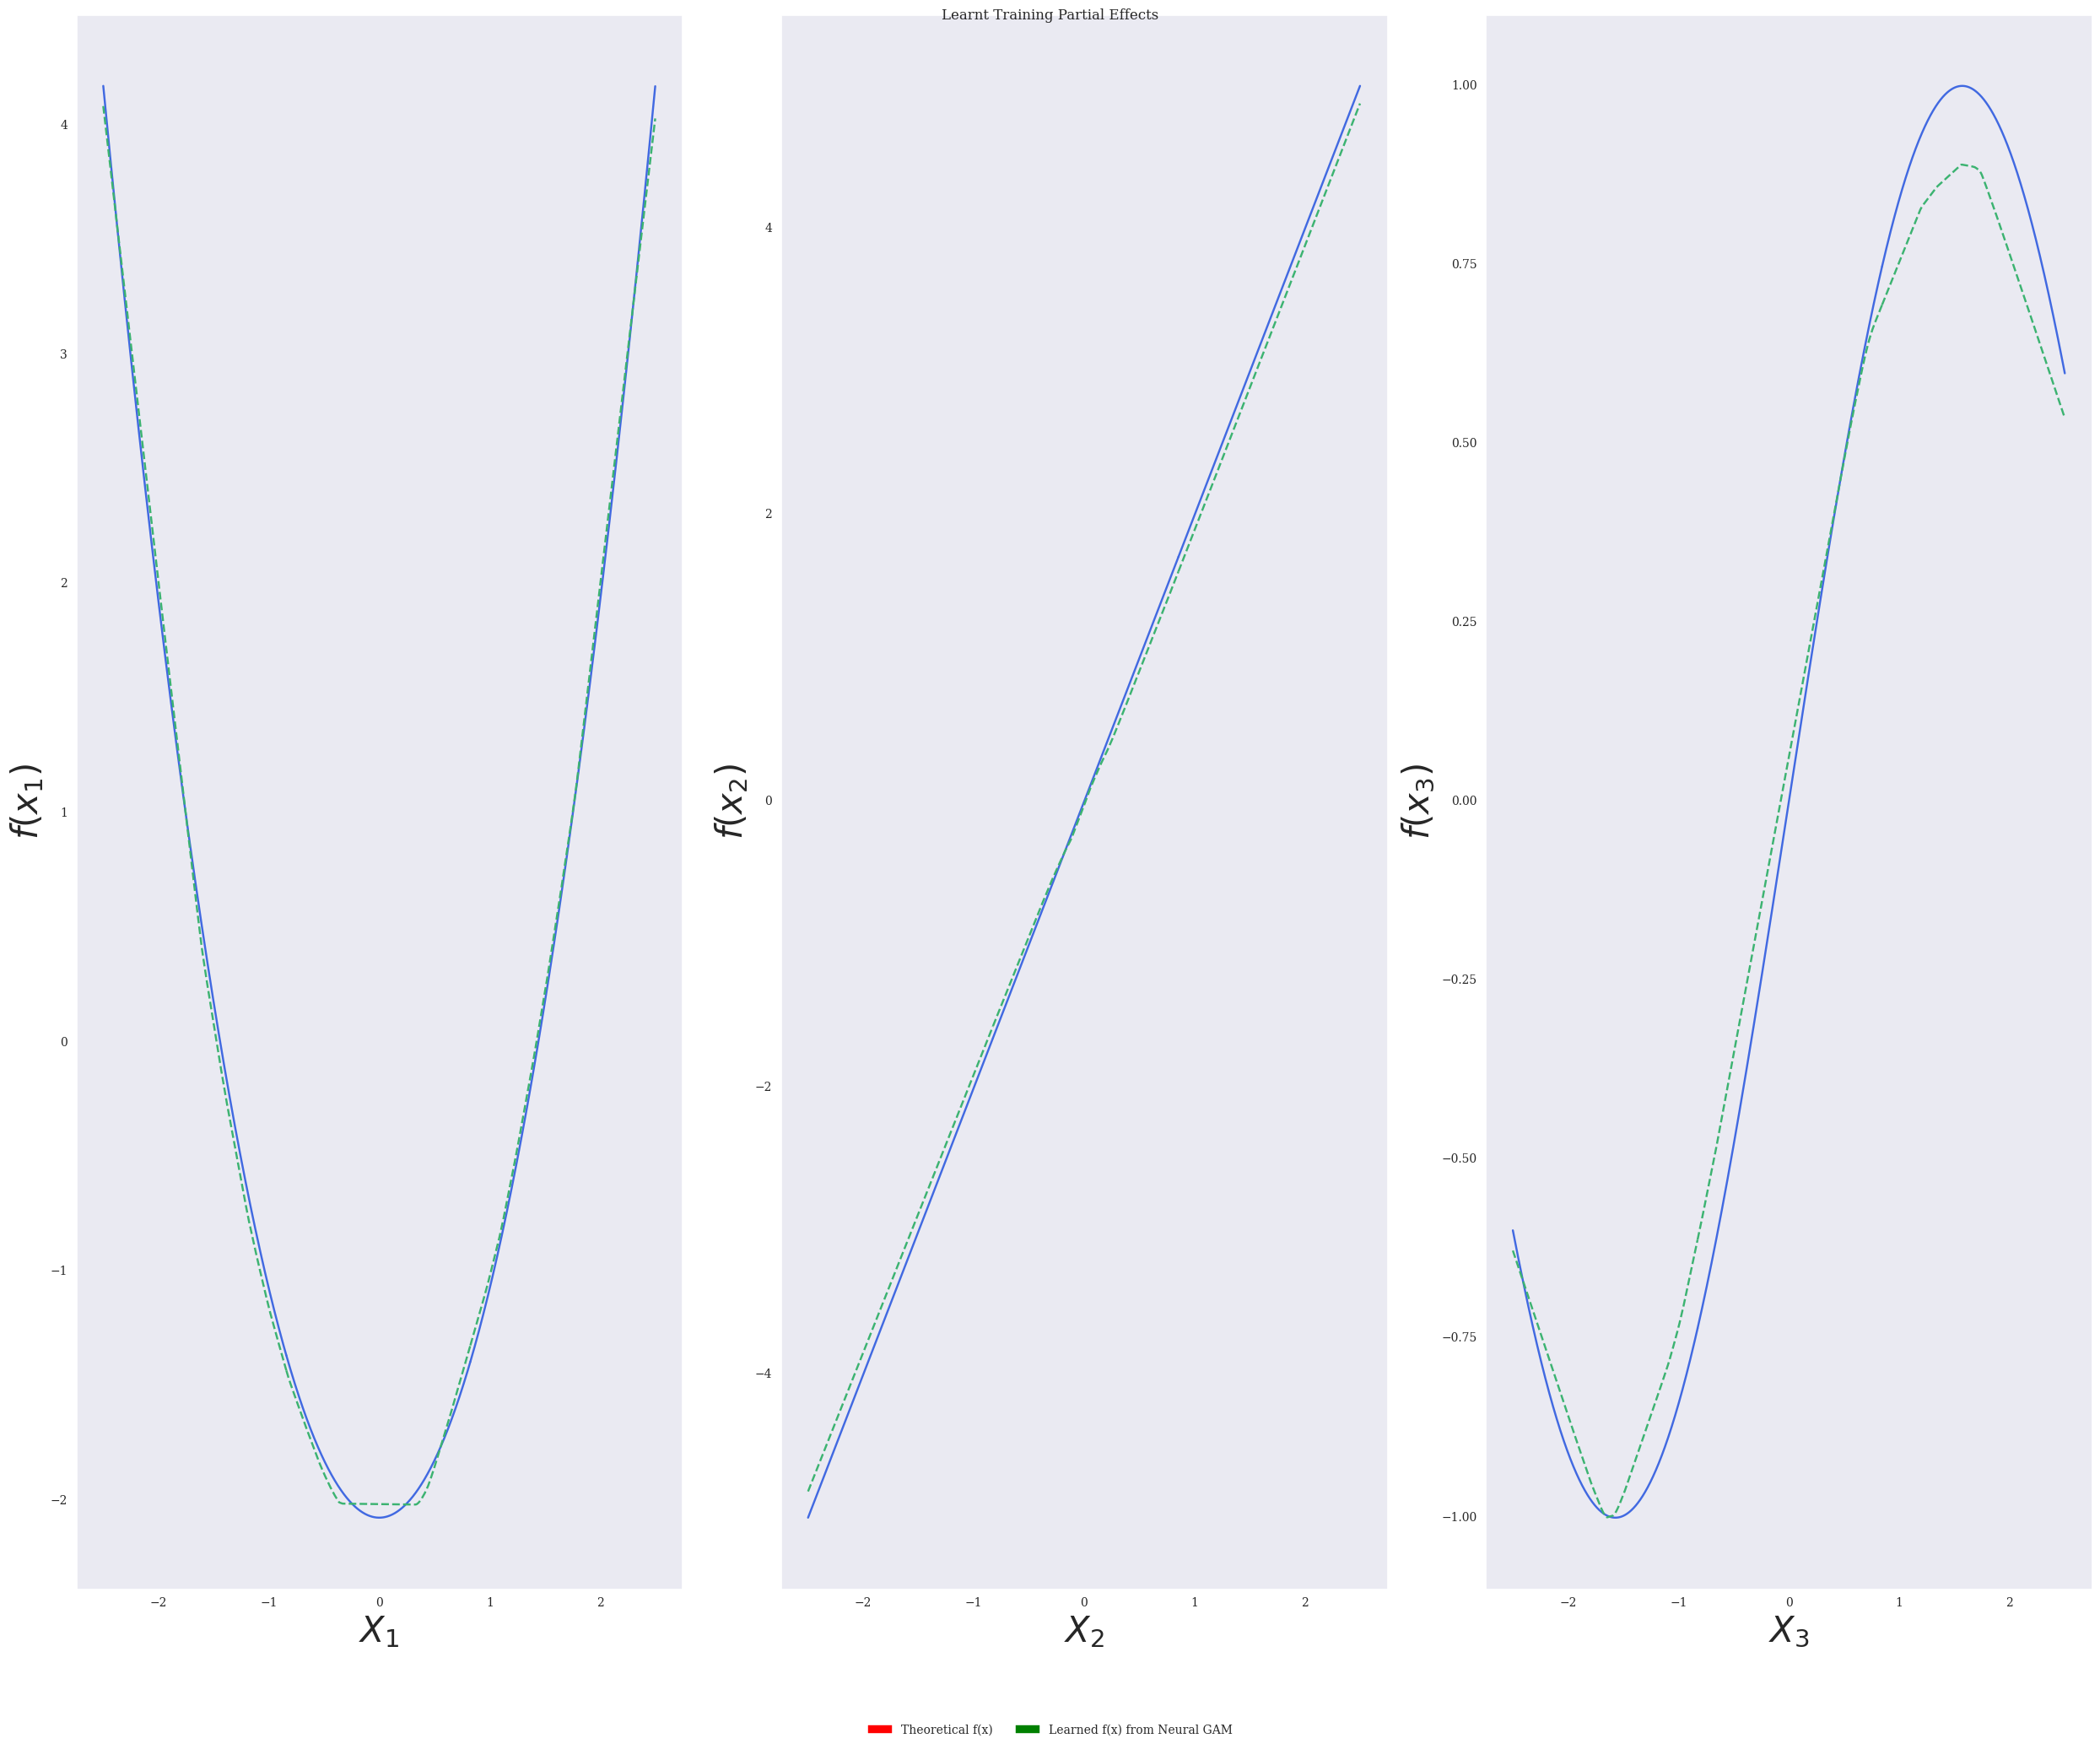

In [19]:
from src.utils.utils import experiments_plot_partial_dependencies
experiments_plot_partial_dependencies(x_list=[X_train, X_train], f_list=[fs_train, fs_train_estimated], legends=["true", "estimated"], title="Learnt Training Partial Effects")

We can now use the trained NeuralGAM model to make predictions on unseen data, and compute the MSE between the trained and predicted estimations: 

In [15]:
y_pred, eta_pred = ngam.predict(X_test)
mean_squared_error(y_test, y_pred)

157/157 [==============================] - 0s 3ms/step


0.2717986840182961